In [ ]:
!pip install pyreadr

In [1]:
import pyreadr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import warnings
warnings.filterwarnings('ignore')

## Importando Base R

In [6]:
#Importa base e transforma em objeto
rData = pyreadr.read_r(r'bases\Pesquisa Binária.RData')

In [7]:
#Verifica o nomne do objeto
print(rData.keys())

odict_keys(['PesquisaBinária'])


In [8]:
#Transforma o objeto em um pandas DataFrame
pesquisaBinaria = rData['PesquisaBinária']

In [9]:
pesquisaBinaria.head()

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,...,q42,q43,q44,q45,q46,q47,q48,q49,q50,setor
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,2.0
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0
3,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,3.0
4,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,3.0


In [6]:
#Converte variáveis em int
pesquisaBinaria = pesquisaBinaria.astype(int)

In [7]:
pesquisaBinaria.head()

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,...,q42,q43,q44,q45,q46,q47,q48,q49,q50,setor
0,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,1
1,0,1,0,0,0,0,0,1,1,0,...,1,0,1,1,1,0,1,0,1,2
2,0,1,0,1,0,1,0,1,1,0,...,1,0,1,0,0,0,1,0,1,2
3,1,0,1,1,0,1,0,0,0,1,...,1,0,1,0,1,0,1,0,1,3
4,1,0,0,1,1,1,0,0,1,1,...,0,0,1,0,1,0,1,0,1,3


In [8]:
#Contagem das categorias
for column in pesquisaBinaria.columns:
    print(column)
    print(pesquisaBinaria[column].value_counts())

q1
0    25
1    10
Name: q1, dtype: int64
q2
0    20
1    15
Name: q2, dtype: int64
q3
0    26
1     9
Name: q3, dtype: int64
q4
0    22
1    13
Name: q4, dtype: int64
q5
0    24
1    11
Name: q5, dtype: int64
q6
0    18
1    17
Name: q6, dtype: int64
q7
0    22
1    13
Name: q7, dtype: int64
q8
0    25
1    10
Name: q8, dtype: int64
q9
0    19
1    16
Name: q9, dtype: int64
q10
0    20
1    15
Name: q10, dtype: int64
q11
0    25
1    10
Name: q11, dtype: int64
q12
0    23
1    12
Name: q12, dtype: int64
q13
1    20
0    15
Name: q13, dtype: int64
q14
0    19
1    16
Name: q14, dtype: int64
q15
0    23
1    12
Name: q15, dtype: int64
q16
1    21
0    14
Name: q16, dtype: int64
q17
0    29
1     6
Name: q17, dtype: int64
q18
1    19
0    16
Name: q18, dtype: int64
q19
0    26
1     9
Name: q19, dtype: int64
q20
0    21
1    14
Name: q20, dtype: int64
q21
0    30
1     5
Name: q21, dtype: int64
q22
0    26
1     9
Name: q22, dtype: int64
q23
0    25
1    10
Name: q23, dtype: int64
q24
0 

## Criando Base de Emparelhamento Simples

Para variáveis binárias, necessário calcular a similaridade.

Uma das medidas é a <b>medida de emparelhamento simples ou Sokal and Michener (1958)</b>:


<img src = tabela_emparelhamento_simples.jpg style="width: 400px;">
<br>
<img src = formula_emparelhamento_simples.jpg style="width: 400px;">
<br>
Mais abaixo, cria-se a matriz de similaridade aplicando esse método como ilustração e para fins didáticos.


In [9]:
#https://docs.scipy.org/doc/scipy/reference/spatial.distance.html
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html#scipy.spatial.distance.pdist
from scipy.spatial import distance

#seleciona as variáveis
variaveis = pesquisaBinaria.iloc[:,:50]

#cria a matriz de simularidade
matriz_diss = distance.pdist(variaveis, metric='sokalmichener')

In [10]:
matriz_diss

array([0.79518072, 0.71794872, 0.66666667, 0.61111111, 0.88888889,
       0.68421053, 0.61111111, 0.41269841, 0.36065574, 0.38709677,
       0.46153846, 0.85057471, 0.30508475, 0.7804878 , 0.7654321 ,
       0.68421053, 0.82352941, 0.68421053, 0.41269841, 0.38709677,
       0.61111111, 0.46153846, 0.80952381, 0.7012987 , 0.7804878 ,
       0.50746269, 0.66666667, 0.64864865, 0.79518072, 0.7804878 ,
       0.66666667, 0.82352941, 0.7012987 , 0.46153846, 0.36065574,
       0.68421053, 0.73417722, 0.41269841, 0.66666667, 0.73417722,
       0.61111111, 0.64864865, 0.63013699, 0.61111111, 0.27586207,
       0.64864865, 0.36065574, 0.4375    , 0.73417722, 0.33333333,
       0.73417722, 0.61111111, 0.5915493 , 0.66666667, 0.57142857,
       0.41269841, 0.64864865, 0.46153846, 0.48484848, 0.68421053,
       0.7012987 , 0.33333333, 0.41269841, 0.71794872, 0.33333333,
       0.71794872, 0.64864865, 0.5915493 , 0.64864865, 0.4375    ,
       0.52941176, 0.64864865, 0.55072464, 0.63013699, 0.64864

# K-Means

## Método de Elbow

Analisando a quantidade de clusters ótimo pelo método Elbow

In [12]:
from sklearn.cluster import KMeans

variaveis = pesquisaBinaria.iloc[:,:50]

sum_sqr = []
max_clusters = pesquisaBinaria.index.nunique()
K = range(1,max_clusters)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(variaveis)
    sum_sqr.append(model.inertia_)


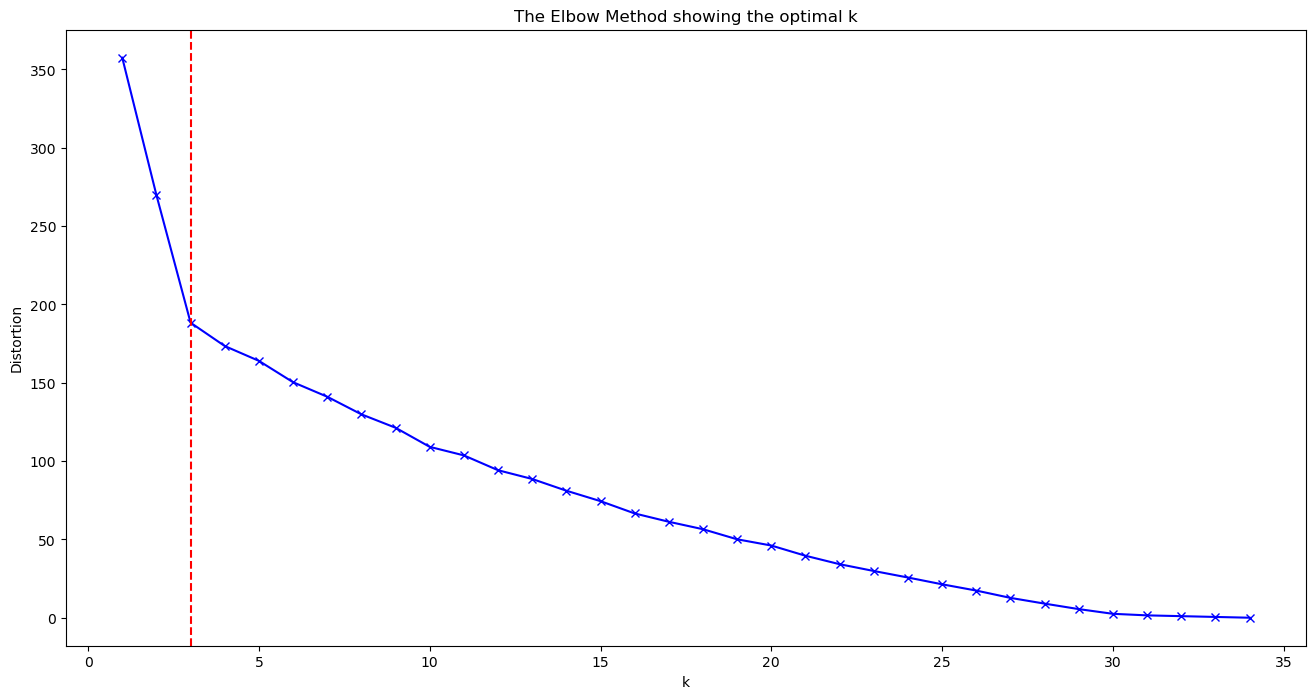

In [13]:
#Gráfico plotando Elbow
plt.figure(figsize=(16,8))
plt.plot(K, sum_sqr, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.axvline(x=3, c='r',ls='--')
plt.show()

In [14]:
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
#https://scikit-learn.org/stable/modules/clustering.html#k-means

#Aplicando K-MEans (Não recomendável para variáveis binárias pois Kmeans usa a distância euclidiana como padrão)
kmeans = KMeans(n_clusters=3).fit(variaveis)

pesquisaBinaria['cluster_K'] = kmeans.labels_

# Cluster Hierárquico

Analisando a quantidade de clusters ótimos pelo Método Hierárquico Aglomerativo

In [15]:
#https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html
import scipy.cluster.hierarchy as shc

#Medida de Distância sokalmichener
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html#scipy.spatial.distance.pdist


clusters = shc.linkage(variaveis,
                     method='average',
                     metric='sokalmichener') #aplica-se a similaridade de emparelhamento simples direto na função linkage

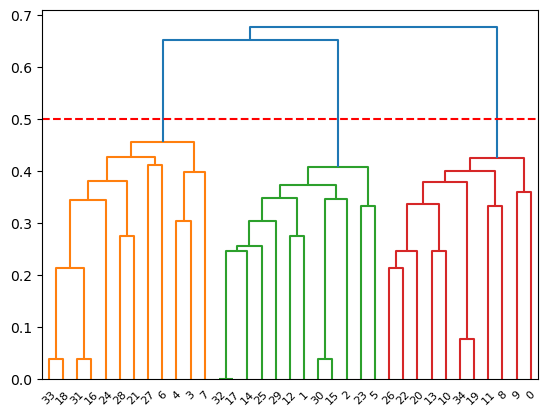

In [16]:
#Plota Dendrograma
plt.figure()
shc.dendrogram(Z=clusters, 
               orientation='top', 
               distance_sort='descending', 
               count_sort='descending',
              )
plt.axhline(y=0.5, c='r',ls='--')
plt.show()

In [17]:
#Formando clusters
grupos = shc.cut_tree(clusters, n_clusters=3)
grupos

array([[0],
       [1],
       [1],
       [2],
       [2],
       [1],
       [2],
       [2],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [2],
       [1],
       [2],
       [0],
       [0],
       [2],
       [0],
       [1],
       [2],
       [1],
       [0],
       [2],
       [2],
       [1],
       [1],
       [2],
       [1],
       [2],
       [0]])

In [18]:
pesquisaBinaria['cluster_H'] = grupos

## Resultado Final com a Classificação dos Dois Métodos

In [19]:
pesquisaBinaria.sort_values('setor')

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,...,q44,q45,q46,q47,q48,q49,q50,setor,cluster_K,cluster_H
0,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
26,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
22,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
19,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
13,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,1,0,0
11,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
9,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
34,0,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,1,0,0
